#  Policy Gradients

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Саттон Р. С., Барто Э. Дж. Обучение с подкреплением: Введение. 2-е изд.
* Лю Ю. (Х.) Обучение с подкреплением на PyTorch: сборник рецептов / пер. с англ. А. А. Слинкина. – М.: ДМК Пресс, 2020
* https://www.youtube.com/watch?v=_x0ASf9jV9U&ab_channel=sim0nsays
* https://karpathy.github.io/2016/05/31/rl/
* https://neerc.ifmo.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_policy_gradient_%D0%B8_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B0%D1%81%D0%B8%D0%BD%D1%85%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B0%D0%BA%D1%82%D0%BE%D1%80%D0%B0-%D0%BA%D1%80%D0%B8%D1%82%D0%B8%D0%BA%D0%B0
* https://spinningup.openai.com/en/latest/spinningup/rl_intro3.html
* https://huggingface.co/learn/deep-rl-course/unit4/introduction
* https://lilianweng.github.io/posts/2018-04-08-policy-gradient/#:~:text=The%20goal%20of%20reinforcement%20learning,and%20optimizing%20the%20policy%20directly.

## Задачи для совместного разбора

1\. Рассмотрите основные шаги по формированию обучающей выборки для использования алгоритмов Policy Gradients.

In [ ]:
import torch as th

In [ ]:
state_dim = 5
n_action = 3

state = th.rand(state_dim)

In [ ]:
import torch.nn as nn

In [ ]:
model = nn.Sequential(
    nn.Linear(state_dim, n_action),
    nn.Softmax()
)

In [ ]:
prediction = model(state)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [ ]:
action = th.multinomial(prediction, 1).item()
action

1

In [ ]:
log_prob = prediction[action].log()
log_prob

tensor(-1.2457, grad_fn=<LogBackward0>)

In [ ]:
th.rand(1)

tensor([0.3566])

In [ ]:
log_probs = []
rewards = []

state = th.rand(state_dim) # reset
for _ in range(10):
  # ... env.step()
  prediction = model(state)
  action = th.multinomial(prediction, 1).item()
  log_prob = prediction[action].log()
  r = th.rand(1)

  log_probs.append(log_prob)
  rewards.append(r.item())

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [ ]:
log_probs

[tensor(-1.0952, grad_fn=<LogBackward0>),
 tensor(-1.0952, grad_fn=<LogBackward0>),
 tensor(-0.9927, grad_fn=<LogBackward0>),
 tensor(-1.2209, grad_fn=<LogBackward0>),
 tensor(-1.2209, grad_fn=<LogBackward0>),
 tensor(-0.9927, grad_fn=<LogBackward0>),
 tensor(-1.0952, grad_fn=<LogBackward0>),
 tensor(-1.0952, grad_fn=<LogBackward0>),
 tensor(-0.9927, grad_fn=<LogBackward0>),
 tensor(-1.2209, grad_fn=<LogBackward0>)]

In [ ]:
rewards # r

[0.3319135308265686,
 0.35195595026016235,
 0.6651511192321777,
 0.8631353378295898,
 0.042236268520355225,
 0.1988416314125061,
 0.5230377912521362,
 0.379170298576355,
 0.7268886566162109,
 0.1322454810142517]

In [ ]:
len(rewards)

10

In [ ]:
gamma = 0.99
R[9] = 0.1322454810142517
R[8] = 0.7268886566162109 + gamma* 0.1322454810142517
# ...

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Допишите классы `Policy` для реализации модели политики и `Trainer` для реализации процесса обучения модели при помощи алгоритма REINFORCE. Настройте агента для игры в окружении `CartPole-v1`. Визуализируйте динамику значений награды на эпизод в процессе обучения. Сыграйте эпизод, используя обученного агента, и убедитесь, что агент выучивается, как стабилизировать шест.

$$L_{PG} = -\sum_{i}{R_i\log{p(a_i|s_i)}}$$

$$R_t = \sum_{k=0}^{\infty}\gamma^kr_{t+k}$$

где $r_t$ - награда за шаг $t$.


- [ ] Проверено на семинаре

In [ ]:
import torch
import gymnasium as gym
import torch.nn as nn

In [ ]:
from dataclasses import dataclass
@dataclass
class PolicyConfig:
    n_state: int
    n_action: int
    n_hidden: int

In [ ]:
class PolicyNetwork(nn.Module):
    def __init__(self, policy_config: PolicyConfig):
        super().__init__()
        self.cfg = policy_config
        self.model = ...

    def forward(self, s: th.Tensor) -> th.Tensor:
        return self.model(s)

    def get_action(self, s: th.Tensor) -> tuple[int, float]:
        # возвращает действие пропорционально вероятностям, полученным при помощи модели
        # и логарифм вероятности выбранного действия
        pass

In [ ]:
from dataclasses import dataclass

@dataclass
class TrainConfig:
    gamma: float = 0.99
    learning_rate: float = 0.001
    episode_num: float = 400

<p class="task" id="2"></p>

2\. Повторите решение задачи 1, делая шаг обучения не после одного эпизода, а по результату прогонов нескольких эпизодов. Обратите внимание, что после обновления весов модели все старые данные для обучения становятся неактуальными и должны быть удалены.

- [ ] Проверено на семинаре

<p class="task" id="3"></p>

3\. Повторите решение задачи 1, реализовав алгоритм REINFONCE с baseline.

$$L_{PG} = -\sum_{i}{A_i\log{p(a_i|s_i)}}$$

$$A_i = R_i - V(s_i)$$

$$R_t = \sum_{k=0}^{\infty}\gamma^kr_{t+k}$$

где $r_t$ - награда за шаг $t$.

$p(a_i|s_i)$ и $V(s_i)$ моделируются при помощи двух независимых сетей. Сеть для политики настраивается аналогично задаче 1 и 2 при помощи функции потерь $L_{PG}$. Сеть для оценки базы настраивается в процессе решения задачи регрессии: $L_{V} = \sum_i(V(s_i) - R_i)^2$. Настройка весов обеих моделей происходит после каждого эпизода.

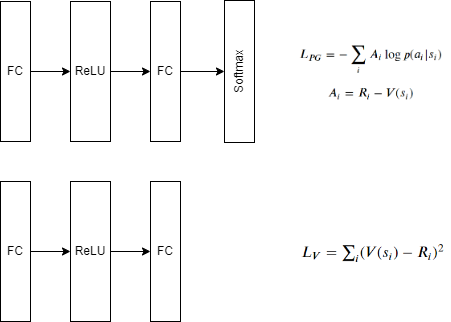

- [ ] Проверено на семинаре

<p class="task" id="4"></p>

4\. Повторите решение задачи 1, реализовав алгоритм Actor-Critic

$$L_{PG} = -\sum_{i}{A_i\log{p(a_i|s_i)}}$$

$$A_i = R_i - V(s_i)$$

$$R_t = \sum_{k=0}^{\infty}\gamma^kr_{t+k}$$

где $r_t$ - награда за шаг $t$.

$p(a_i|s_i)$ и $V(s_i)$ моделируются при помощи одной сети в двумя головами. Голова для политики настраивается аналогично задаче 1 и 2 при помощи функции потерь $L_{PG}$. Голова для оценки базы настраивается в процессе решения задачи регрессии: $L_{V} = \sum_i(V(s_i) - R_i)^2$. Итоговая функции потерь для настройки представляет из себя сумму функций потерь для голов: $L = L_{PG} + L_{V}$.

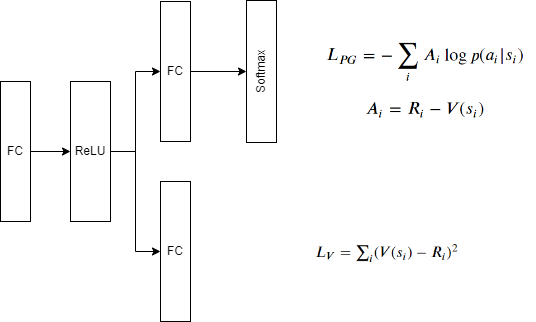

- [ ] Проверено на семинаре

## Обратная связь
- [ ] Хочу получить обратную связь по решению